In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [5]:
df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
df['TARGET'] = boston['target']
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


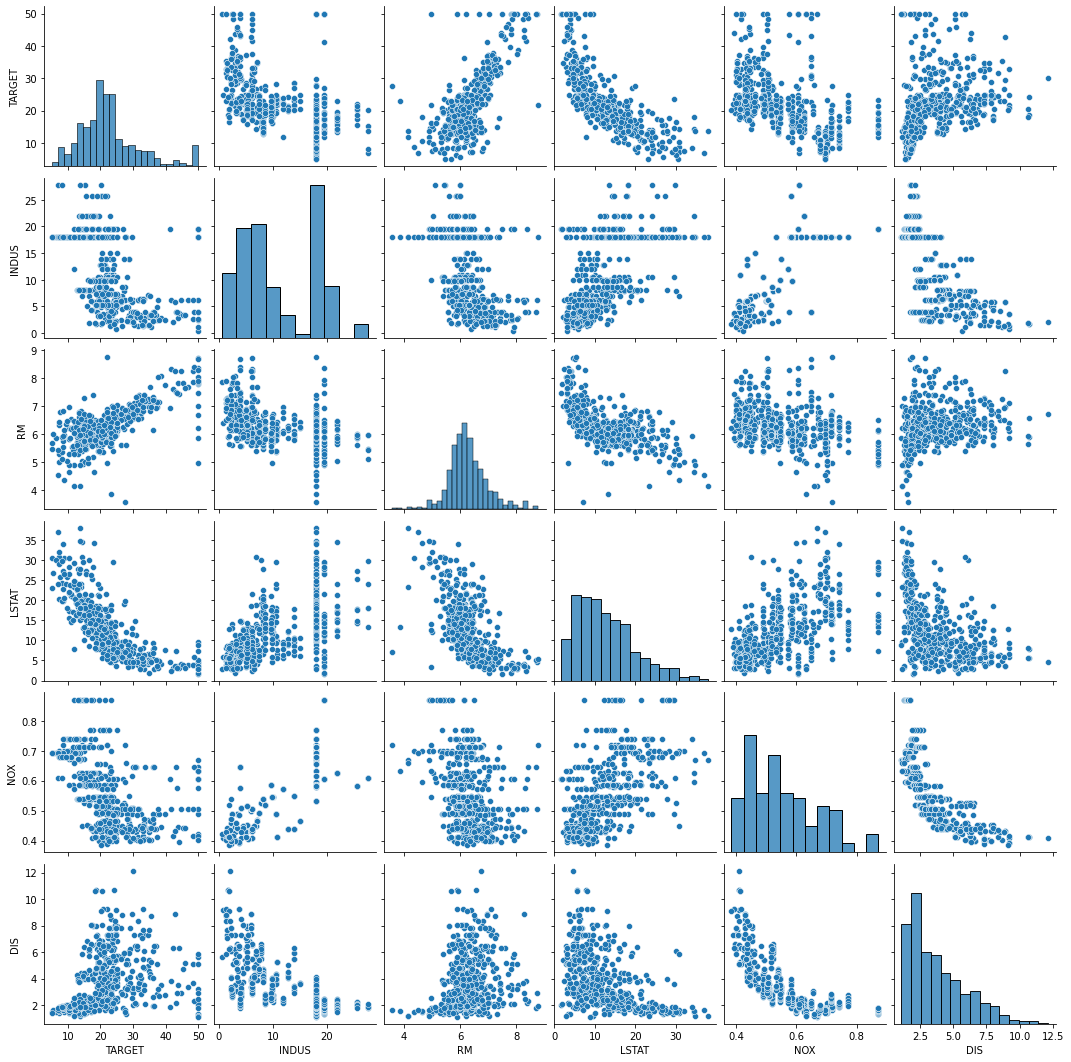

In [10]:
cols = ['TARGET', 'INDUS', 'RM', 'LSTAT', 'NOX', 'DIS']
sns.pairplot(df[cols])
plt.show()

In [15]:
data = torch.from_numpy(df[cols].values).float()
data.shape

torch.Size([506, 6])

In [16]:
X = data[:, 1:]
y = data[:, :1]
X.shape, y.shape

(torch.Size([506, 5]), torch.Size([506, 1]))

In [17]:
n_epochs = 2000
learning_rate = 1e-3
print_interval = 100

In [20]:
model = nn.Linear(X.size(-1), y.size(-1))
model, model.parameters()

(Linear(in_features=5, out_features=1, bias=True),
 <generator object Module.parameters at 0x0000024CA627E350>)

In [21]:
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [22]:
for i in range(n_epochs):
    y_hat = model(X)
    loss = F.mse_loss(y_hat, y)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    if (i + 1) % print_interval == 0:
        print(f'Epoch {i + 1}: loss={loss:.4e}')

Epoch 100: loss=4.5055e+01
Epoch 200: loss=3.7939e+01
Epoch 300: loss=3.4015e+01
Epoch 400: loss=3.1803e+01
Epoch 500: loss=3.0556e+01
Epoch 600: loss=2.9853e+01
Epoch 700: loss=2.9456e+01
Epoch 800: loss=2.9233e+01
Epoch 900: loss=2.9106e+01
Epoch 1000: loss=2.9035e+01
Epoch 1100: loss=2.8994e+01
Epoch 1200: loss=2.8971e+01
Epoch 1300: loss=2.8958e+01
Epoch 1400: loss=2.8950e+01
Epoch 1500: loss=2.8945e+01
Epoch 1600: loss=2.8942e+01
Epoch 1700: loss=2.8940e+01
Epoch 1800: loss=2.8939e+01
Epoch 1900: loss=2.8938e+01
Epoch 2000: loss=2.8937e+01


In [27]:
df = pd.DataFrame(torch.concat([y, y_hat], dim=1).detach_().numpy(), columns=['y', 'y_hat'])
df

,y,y_hat
0,24.000000,30.277809
1,21.600000,25.322958
2,34.700001,32.554276
3,33.400002,32.388374
4,36.200001,31.753326
...,...,...
501,22.400000,26.773510
502,20.600000,24.702860
503,23.900000,31.512192
504,22.000000,29.856043


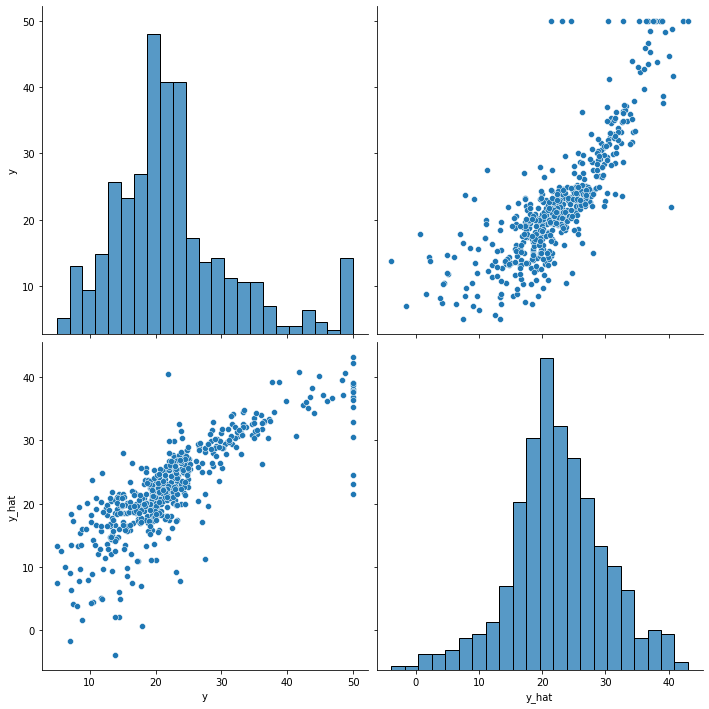

In [28]:
sns.pairplot(df, height=5)
plt.show()